In [48]:
import numpy.random as npr
import numpy as np
import pandas as pd
import numpy.random as npr
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
# import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression

In [49]:
nusers = 100
treeatment = npr.choice([0,1], nusers)
group = npr.choice(np.arange(7),nusers)+1
covariate = npr.normal(0,1,nusers)
metric = 1 * covariate + npr.normal(0,0.1*group,nusers) +  0.1*treeatment                      

In [50]:
df = pd.DataFrame([treeatment, group, covariate, metric], index=['treeatment', 'group', 'covariate', 'metric']).T
df

,treeatment,group,covariate,metric
0,1.0,2.0,0.272822,0.690744
1,0.0,6.0,-1.745190,-0.743403
2,1.0,6.0,0.170527,-0.136818
3,0.0,6.0,0.065030,0.083995
4,0.0,3.0,0.781796,1.071559
...,...,...,...,...
95,0.0,2.0,0.852484,0.862993
96,0.0,4.0,-1.721760,-1.453622
97,0.0,4.0,1.149904,1.011631
98,1.0,7.0,1.177929,0.405840


In [51]:
df.groupby([df.treeatment, df.group]).mean()

covariate    metric
treeatment group                     
0.0        1.0    -0.586872 -0.597823
           2.0     0.234000  0.207138
           3.0     0.182328  0.197622
           4.0    -0.568608 -0.551366
           5.0    -0.176293 -0.316944
           6.0    -0.297206 -0.323270
           7.0     0.268982 -0.137283
1.0        1.0     0.335152  0.446195
           2.0    -0.389656 -0.182029
           3.0    -0.304211 -0.221323
           4.0     0.320815  0.329215
           5.0    -0.001009  0.106990
           6.0     0.752307  0.267667
           7.0     0.499902  0.496830

In [52]:
df['cuped_metric'] = metric - (np.cov(covariate,metric)[0,1]/np.var(covariate)) * (covariate - np.mean(covariate))

In [53]:
np.var(df['metric']), np.var(df['cuped_metric'])

(0.9524978014954129, 0.1675358849794191)

In [54]:
# VAR_Y_HAT = 
np.var(metric) * (1 - np.corrcoef(covariate,metric)[0,1])

0.08777195300040636

In [55]:
import statsmodels.stats.weightstats as smw

In [56]:
x = df['metric'][df['treeatment']==0]
y = df['metric'][df['treeatment']!=0]

In [57]:
smw.ttest_ind(x,y,usevar='pooled')

(-1.605311596990935, 0.11164303148005304, 98.0)

In [58]:
smw.ttest_ind(x,y,usevar='unequal')

(-1.6120505032869026, 0.11016867406626063, 97.94754676810769)

In [59]:
x = df['cuped_metric'][df['treeatment']==0]
y = df['cuped_metric'][df['treeatment']!=0]

In [60]:
smw.ttest_ind(x,y,usevar='pooled')

(-1.8196654633756078, 0.07186296917660022, 98.0)

In [61]:
smw.ttest_ind(x,y,usevar='unequal')

(-1.8055422277075281, 0.07428763218554889, 91.24590131513291)

### Linear Regression


In [65]:
x = df['covariate']
x = sm.add_constant(x)
model = sm.OLS(df['metric'], x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 metric   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     459.4
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           8.98e-39
Time:                        14:19:59   Log-Likelihood:                -52.542
No. Observations:                 100   AIC:                             109.1
Df Residuals:                      98   BIC:                             114.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0348      0.041     -0.840      0.4

In [63]:
print("Parameters: ", results.params)
print("R2: ", results.rsquared)

Parameters:  const       -0.034777
covariate    0.906973
dtype: float64
R2:  0.824192993871725


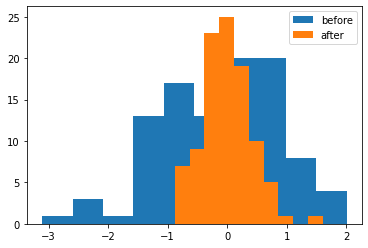

In [67]:
plt.hist(df['metric'])
plt.hist(results.resid)
plt.legend(['before','after'])

In [19]:
model = sm.OLS(results.resid, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                     0.000
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               1.00
Time:                        12:55:02   Log-Likelihood:                -70.358
No. Observations:                 100   AIC:                             144.7
Df Residuals:                      98   BIC:                             149.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.638e-17      0.050   1.14e-15      1.0

In [24]:
x = df['treeatment']
x = sm.add_constant(x)
model = sm.OLS(results.resid, x)
results_1 = model.fit()
print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                -1.558e-14
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               1.00
Time:                        12:55:32   Log-Likelihood:                -66.980
No. Observations:                 100   AIC:                             138.0
Df Residuals:                      98   BIC:                             143.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.729e-18      0.067   4.08e-17      1.0

In [25]:
print("Parameters: ", results_1.params)
print("R2: ", results_1.rsquared)


Parameters:  const         2.729312e-18
treeatment    1.084202e-16
dtype: float64
R2:  -2.220446049250313e-16


In [27]:
x = df.loc[:,['covariate', 'treeatment']]
x = sm.add_constant(x)
model = sm.OLS(df['metric'], x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 metric   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     252.1
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           3.76e-39
Time:                        12:55:50   Log-Likelihood:                -66.960
No. Observations:                 100   AIC:                             139.9
Df Residuals:                      97   BIC:                             147.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0316      0.068     -0.467      0.6

In [28]:
print("Parameters: ", results.params)
print("R2: ", results.rsquared)


Parameters:  const        -0.031623
covariate     0.984180
treeatment    0.251485
dtype: float64
R2:  0.8386592708112424


In [30]:
x = df.loc[:,['group', 'treeatment']]
x = sm.add_constant(x)
model = sm.OLS(df['metric'], x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 metric   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1.922
Date:                Mon, 07 Nov 2022   Prob (F-statistic):              0.152
Time:                        12:55:56   Log-Likelihood:                -156.23
No. Observations:                 100   AIC:                             318.5
Df Residuals:                      97   BIC:                             326.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4257      0.295     -1.443      0.1

In [31]:
print("Parameters: ", results.params)
print("R2: ", results.rsquared)


Parameters:  const        -0.425678
group         0.051163
treeatment    0.405542
dtype: float64
R2:  0.03811365984183768


In [33]:
x = df.loc[:,['group', 'covariate', 'treeatment']]
x = sm.add_constant(x)
model = sm.OLS(df['metric'], x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 metric   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     167.7
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           4.84e-38
Time:                        12:56:05   Log-Likelihood:                -66.609
No. Observations:                 100   AIC:                             141.2
Df Residuals:                      96   BIC:                             151.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1149      0.122     -0.943      0.3

In [34]:
print("Parameters: ", results.params)
print("R2: ", results.rsquared)


Parameters:  const        -0.114874
group         0.019931
covariate     0.982014
treeatment    0.249270
dtype: float64
R2:  0.8397877643344308


### Clicks

Pageviews: Number of unique cookies to view the course overview page that day.

Clicks: Number of unique cookies to click the course overview page that day.

Enrollments: Number of user-ids to enroll in the free trial that day.

Payments: Number of user-ids who who enrolled on that day to remain enrolled for 14 days and thus make a payment. (Note that the date for this column is the start date, that is, the date
of enrollment, rather than the date of the payment. The payment happened 14 days later. Because of this, the enrollments and payments are tracked for 14 fewer days than the other columns.)

In [35]:
import math as mt
from scipy.stats import norm

In [36]:
control = pd.read_csv('control_data.csv')
treat = pd.read_csv('experiment_data.csv')

In [37]:
control['treatment'] = 0

In [38]:
treat['treatment'] = 1

In [39]:
df = control.append(treat)

/tmp/ipykernel_338251/3961528094.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = control.append(treat)


In [40]:
df

,Date,Pageviews,Clicks,Enrollments,Payments,treatment
0,"Sat, Oct 11",7723,687,134.0,70.0,0
1,"Sun, Oct 12",9102,779,147.0,70.0,0
2,"Mon, Oct 13",10511,909,167.0,95.0,0
3,"Tue, Oct 14",9871,836,156.0,105.0,0
4,"Wed, Oct 15",10014,837,163.0,64.0,0
...,...,...,...,...,...,...
32,"Wed, Nov 12",10042,802,NaN,NaN,1
33,"Thu, Nov 13",9721,829,NaN,NaN,1
34,"Fri, Nov 14",9304,770,NaN,NaN,1
35,"Sat, Nov 15",8668,724,NaN,NaN,1


In [41]:
Y = df['Clicks']
X = df['Pageviews']
Y_HAT = Y - (np.cov(X,Y)[0,1]/np.var(X)) * (X - np.mean(X))

In [42]:
VAR_Y_HAT = np.var(Y) * (1 - np.corrcoef(X,Y)[0,1])

In [43]:
# np.corrcoef(X,Y)
np.cov(X,Y)

array([[517616.6392077 ,  42725.43446872],
       [ 42725.43446872,   4356.74139208]])

In [44]:
np.var(Y_HAT), VAR_Y_HAT

(819.5076707711819, 431.0425152954054)